# 基于RFM模型使用k-means算法聚类航空消费行为特征数据

In [2]:
import pandas as pd 
data = pd.read_excel("data/i_nuc.xls",index_col="Id",sheet_name="Sheet2")
data

,R,F,M
Id,,,
inuc001,21,17,1256.47
inuc002,1,19,1728.84
inuc003,8,4,617.83
inuc004,10,9,1380.94
inuc005,4,3,1783.68
...,...,...,...
inuc896,1,20,1951.03
inuc897,0,4,1331.32
inuc898,13,27,719.12


In [3]:
outputfile = r"data/data_type.xls"
k = 3 
iteration = 500

In [7]:
zscoredfile = r"data/zscoreddata.xls"
# 数据标准化
data_zs = 1.0*(data -data.mean())/data.std()
# 写入文件
data_zs.to_excel(zscoredfile,index=False)

/var/folders/95/0b9jlx8d4dgdp4pw27fwrd440000gn/T/ipykernel_97889/405460729.py:5: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  data_zs.to_excel(zscoredfile,index=False)


In [11]:
from sklearn.cluster import KMeans 

model = KMeans(n_clusters=k,n_init=4,max_iter = iteration)
model.fit(data_zs)

KMeans(max_iter=500, n_clusters=3, n_init=4)

In [13]:
r1 = pd.Series(model.labels_).value_counts()
r1

1    517
0    343
2     40
dtype: int64

In [14]:
r2 = pd.DataFrame(model.cluster_centers_)
r2 

,0,1,2
0,-0.138183,1.050189,0.397381
1,-0.172012,-0.683968,-0.305443
2,3.405640,-0.295148,0.487604


In [16]:
r = pd.concat([r2,r1],axis=1)
r

,0,1,2,0
0,-0.138183,1.050189,0.397381,343
1,-0.172012,-0.683968,-0.305443,517
2,3.405640,-0.295148,0.487604,40


In [17]:
r.columns = list(data.columns) + [u"类别"]# 重命名表头
print(r)

          R         F         M   类别
0 -0.138183  1.050189  0.397381  343
1 -0.172012 -0.683968 -0.305443  517
2  3.405640 -0.295148  0.487604   40


In [19]:
r = pd.concat([data,pd.Series(model.labels_,index=data.index)],axis=1)
r


,R,F,M,0
Id,,,,
inuc001,21,17,1256.47,0
inuc002,1,19,1728.84,0
inuc003,8,4,617.83,1
inuc004,10,9,1380.94,1
inuc005,4,3,1783.68,1
...,...,...,...,...
inuc896,1,20,1951.03,0
inuc897,0,4,1331.32,1
inuc898,13,27,719.12,0


In [21]:
r.columns = list(data.columns) + [u"聚类类别"]# 重命名表头
r.to_excel(outputfile)

/var/folders/95/0b9jlx8d4dgdp4pw27fwrd440000gn/T/ipykernel_97889/106389201.py:2: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  r.to_excel(outputfile)


In [23]:
r.to_csv("data/data_type.csv")

In [24]:
import matplotlib
import matplotlib.pyplot as plt 
print([f for f in matplotlib.font_manager.fontManager.ttflist if 'Heiti' in f.name])
matplotlib.rcParams['font.family'] = ['Heiti TC']


def density_plot(data):
    p = data.plot(kind="kde",linewidth =2,subplots=True,sharex = False)
    [p[i].set_xlabel(u"密度") for i in range(k)]
        # plt.xlabel("分群%s"%(i+1))
    plt.legend()
    return plt 

[FontEntry(fname='/System/Library/Fonts/STHeiti Light.ttc', name='Heiti TC', style='normal', variant='normal', weight=300, stretch='normal', size='scalable'), FontEntry(fname='/System/Library/Fonts/STHeiti Medium.ttc', name='Heiti TC', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')]


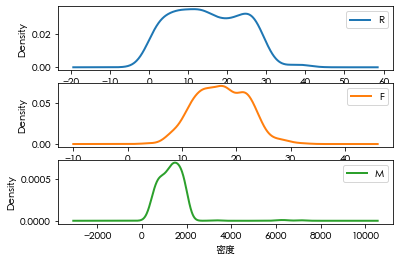

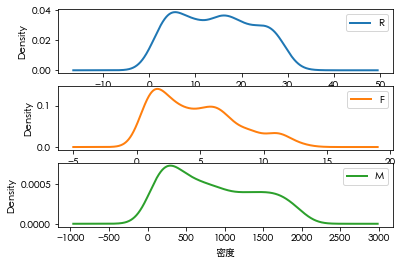

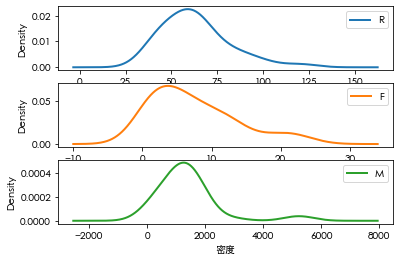

In [25]:
pic_output = r"data/pd_"
for i in range(k):
    density_plot(data[r[u"聚类类别"] ==i]).savefig(u"%s%s.png" %(pic_output,i))